(11430, 89)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent         

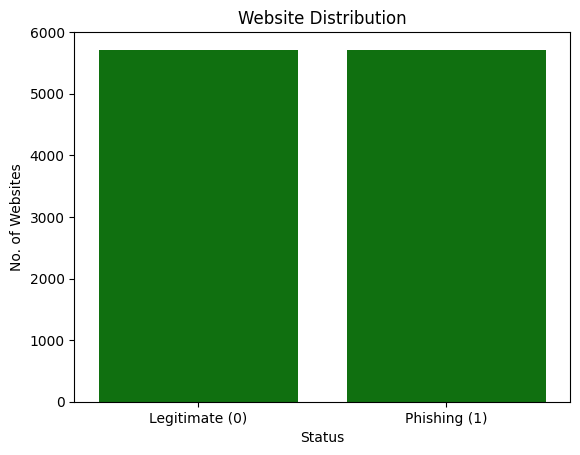

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("dataset_phishing.csv")

# Step 1: Correlation matrix from numeric columns only
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()

# Step 2: Filter for high correlation pairs (abs > 0.8), ignoring diagonal
high_corr = corr_matrix[(np.abs(corr_matrix) > 0.8) & (corr_matrix != 1.0)]

# Step 3: Mask to show only lower triangle for clean visualization
mask = np.triu(np.ones_like(high_corr, dtype=bool))



print(df.shape)
print(df.info())
print(df.describe())
print(df['status'].value_counts())
print(df.columns.tolist())

sns.countplot(x='status', data=df, color= 'green')
plt.title("Website Distribution")
plt.xlabel("Status")
plt.ylabel("No. of Websites")
plt.xticks([0, 1], ['Legitimate (0)', 'Phishing (1)'])
plt.show()




C:\Users\DELL\AppData\Local\Temp\ipykernel_18956\2975295416.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


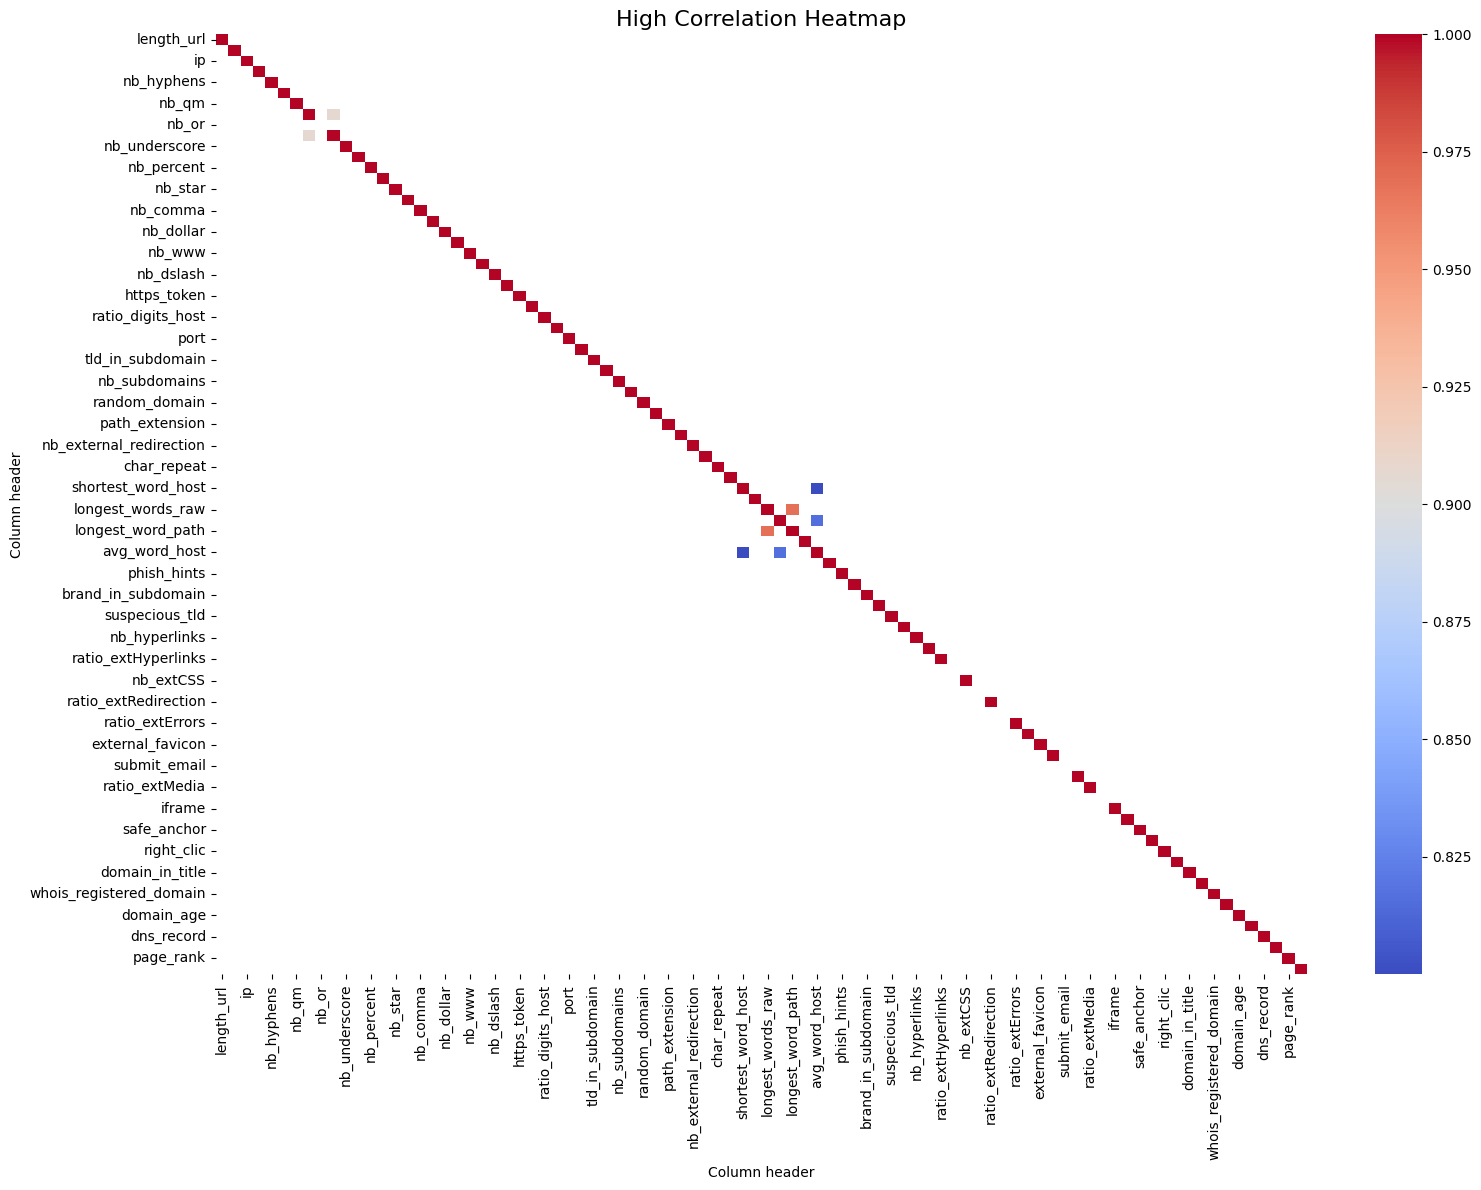

In [25]:
# Step 4: Plot high correlation heatmap
corr = df.corr()
high_corr = corr[(corr > 0.8) | (corr < -0.8)]

plt.figure(figsize=(16, 12))
sns.heatmap(high_corr, cmap='coolwarm', annot=False) 
plt.title("High Correlation Heatmap", fontsize=16)
plt.xlabel("Column header")
plt.ylabel("Column header")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [16]:
# Unstack and sort correlation pairs
high_corr_pairs = high_corr.unstack().dropna().sort_values(ascending=False)
print("\nTop correlated feature pairs (abs > 0.8):")
display(high_corr_pairs)



Top correlated feature pairs (abs > 0.8):


longest_words_raw   longest_word_path     0.968503
longest_word_path   longest_words_raw     0.968503
nb_and              nb_eq                 0.906404
nb_eq               nb_and                0.906404
longest_word_host   avg_word_host         0.816313
avg_word_host       longest_word_host     0.816313
shortest_word_host  avg_word_host         0.800014
avg_word_host       shortest_word_host    0.800014
dtype: float64

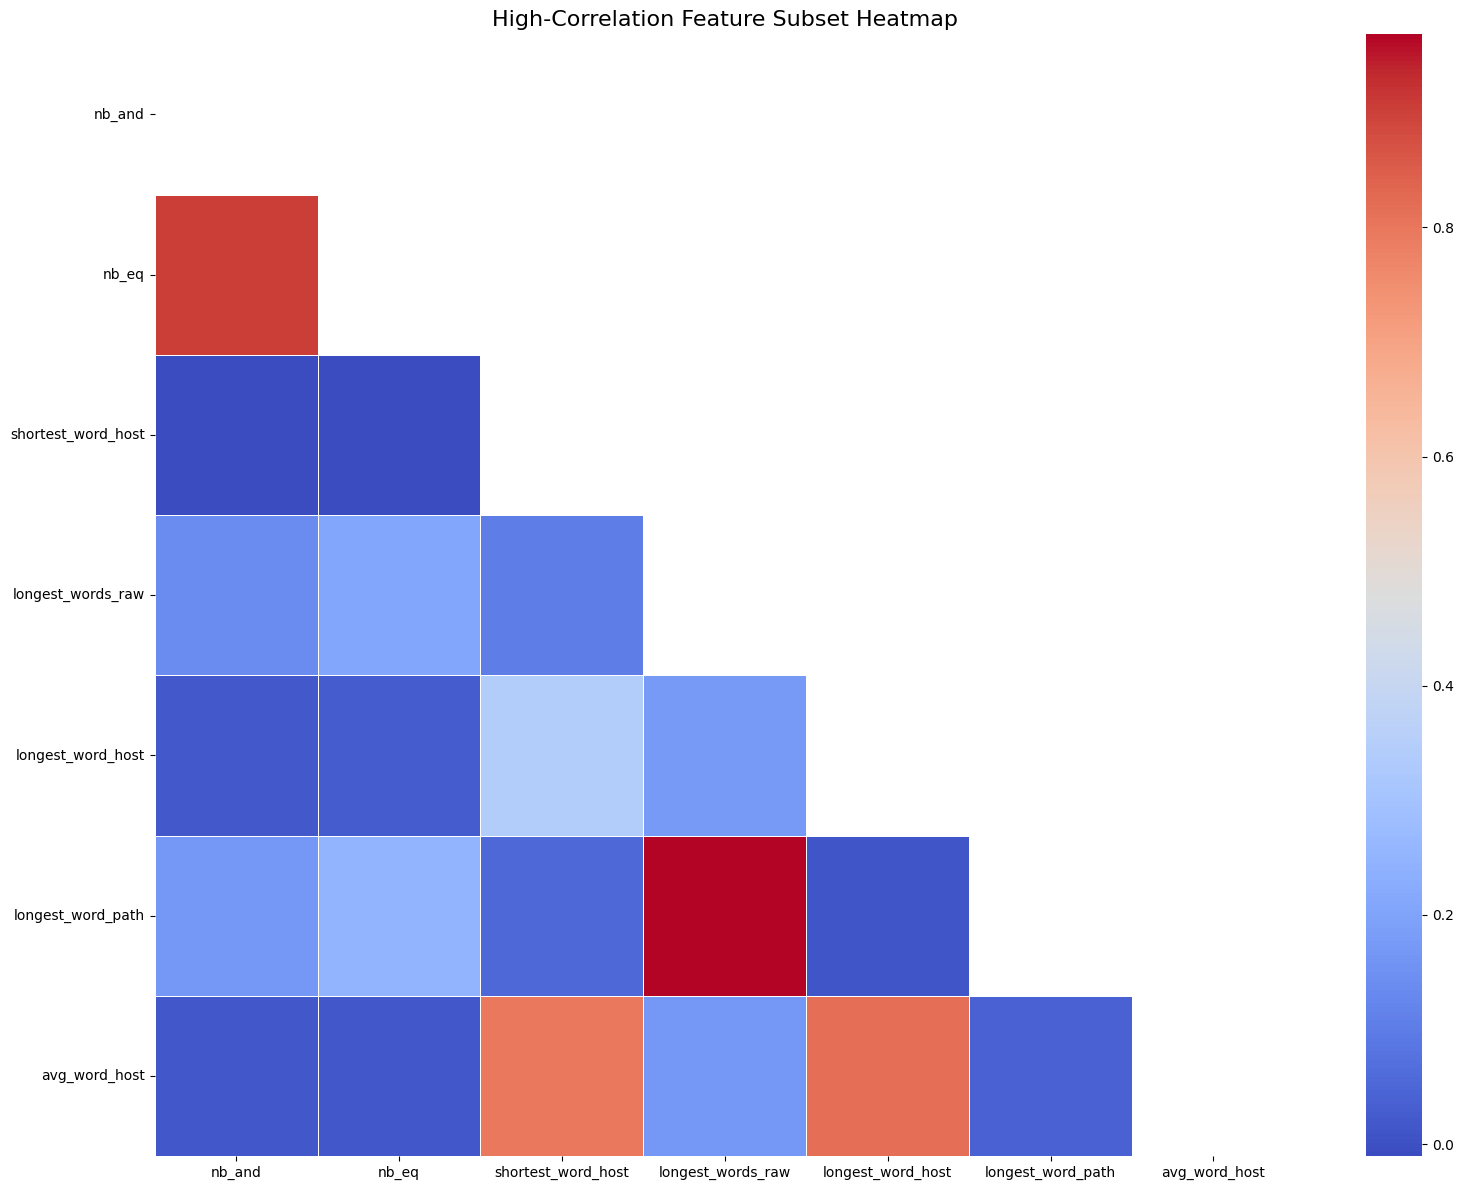

In [21]:
# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Get high correlations
high_corr = corr_matrix[(np.abs(corr_matrix) > 0.8) & (corr_matrix != 1.0)]

# Subset to correlated feature block
filtered_features = high_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').columns.tolist()
filtered_corr = corr_matrix.loc[filtered_features, filtered_features]

# Mask upper triangle
mask = np.triu(np.ones_like(filtered_corr, dtype=bool))

# Plot clean heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(filtered_corr, cmap='coolwarm', annot=False, mask=mask, linewidths=0.5)
plt.title("High-Correlation Feature Subset Heatmap", fontsize=16)
plt.tight_layout()
plt.show()


In [41]:
desc_stats = df.describe()
display(desc_stats)


,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739,0.500000
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955,0.500022
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000,0.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000,0.500000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000,1.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000,1.000000


In [43]:
categorical_cols = df.select_dtypes(include=['int64', 'category']).columns
for col in categorical_cols:
    print(f"\nFrequency distribution for {col}:")
    print(df[col].value_counts())
    print(f"Mode: {df[col].mode()[0]}")



Frequency distribution for length_url:
26     251
29     250
32     250
33     230
27     230
      ... 
393      1
409      1
292      1
216      1
477      1
Name: length_url, Length: 324, dtype: int64
Mode: 26

Frequency distribution for length_hostname:
16     956
15     754
18     731
17     725
14     702
      ... 
212      1
95       1
81       1
78       1
77       1
Name: length_hostname, Length: 83, dtype: int64
Mode: 16

Frequency distribution for ip:
0    9709
1    1721
Name: ip, dtype: int64
Mode: 0

Frequency distribution for nb_dots:
2     6178
3     2431
1     1302
4      952
5      365
6       80
7       49
8       21
14      10
24       8
13       7
9        7
10       5
15       5
16       4
12       2
22       2
19       1
18       1
Name: nb_dots, dtype: int64
Mode: 2

Frequency distribution for nb_hyphens:
0     6945
1     2262
2      852
3      428
4      293
5      181
6      135
7      100
8       66
9       52
10      34
11      23
12      11
13      10
14  

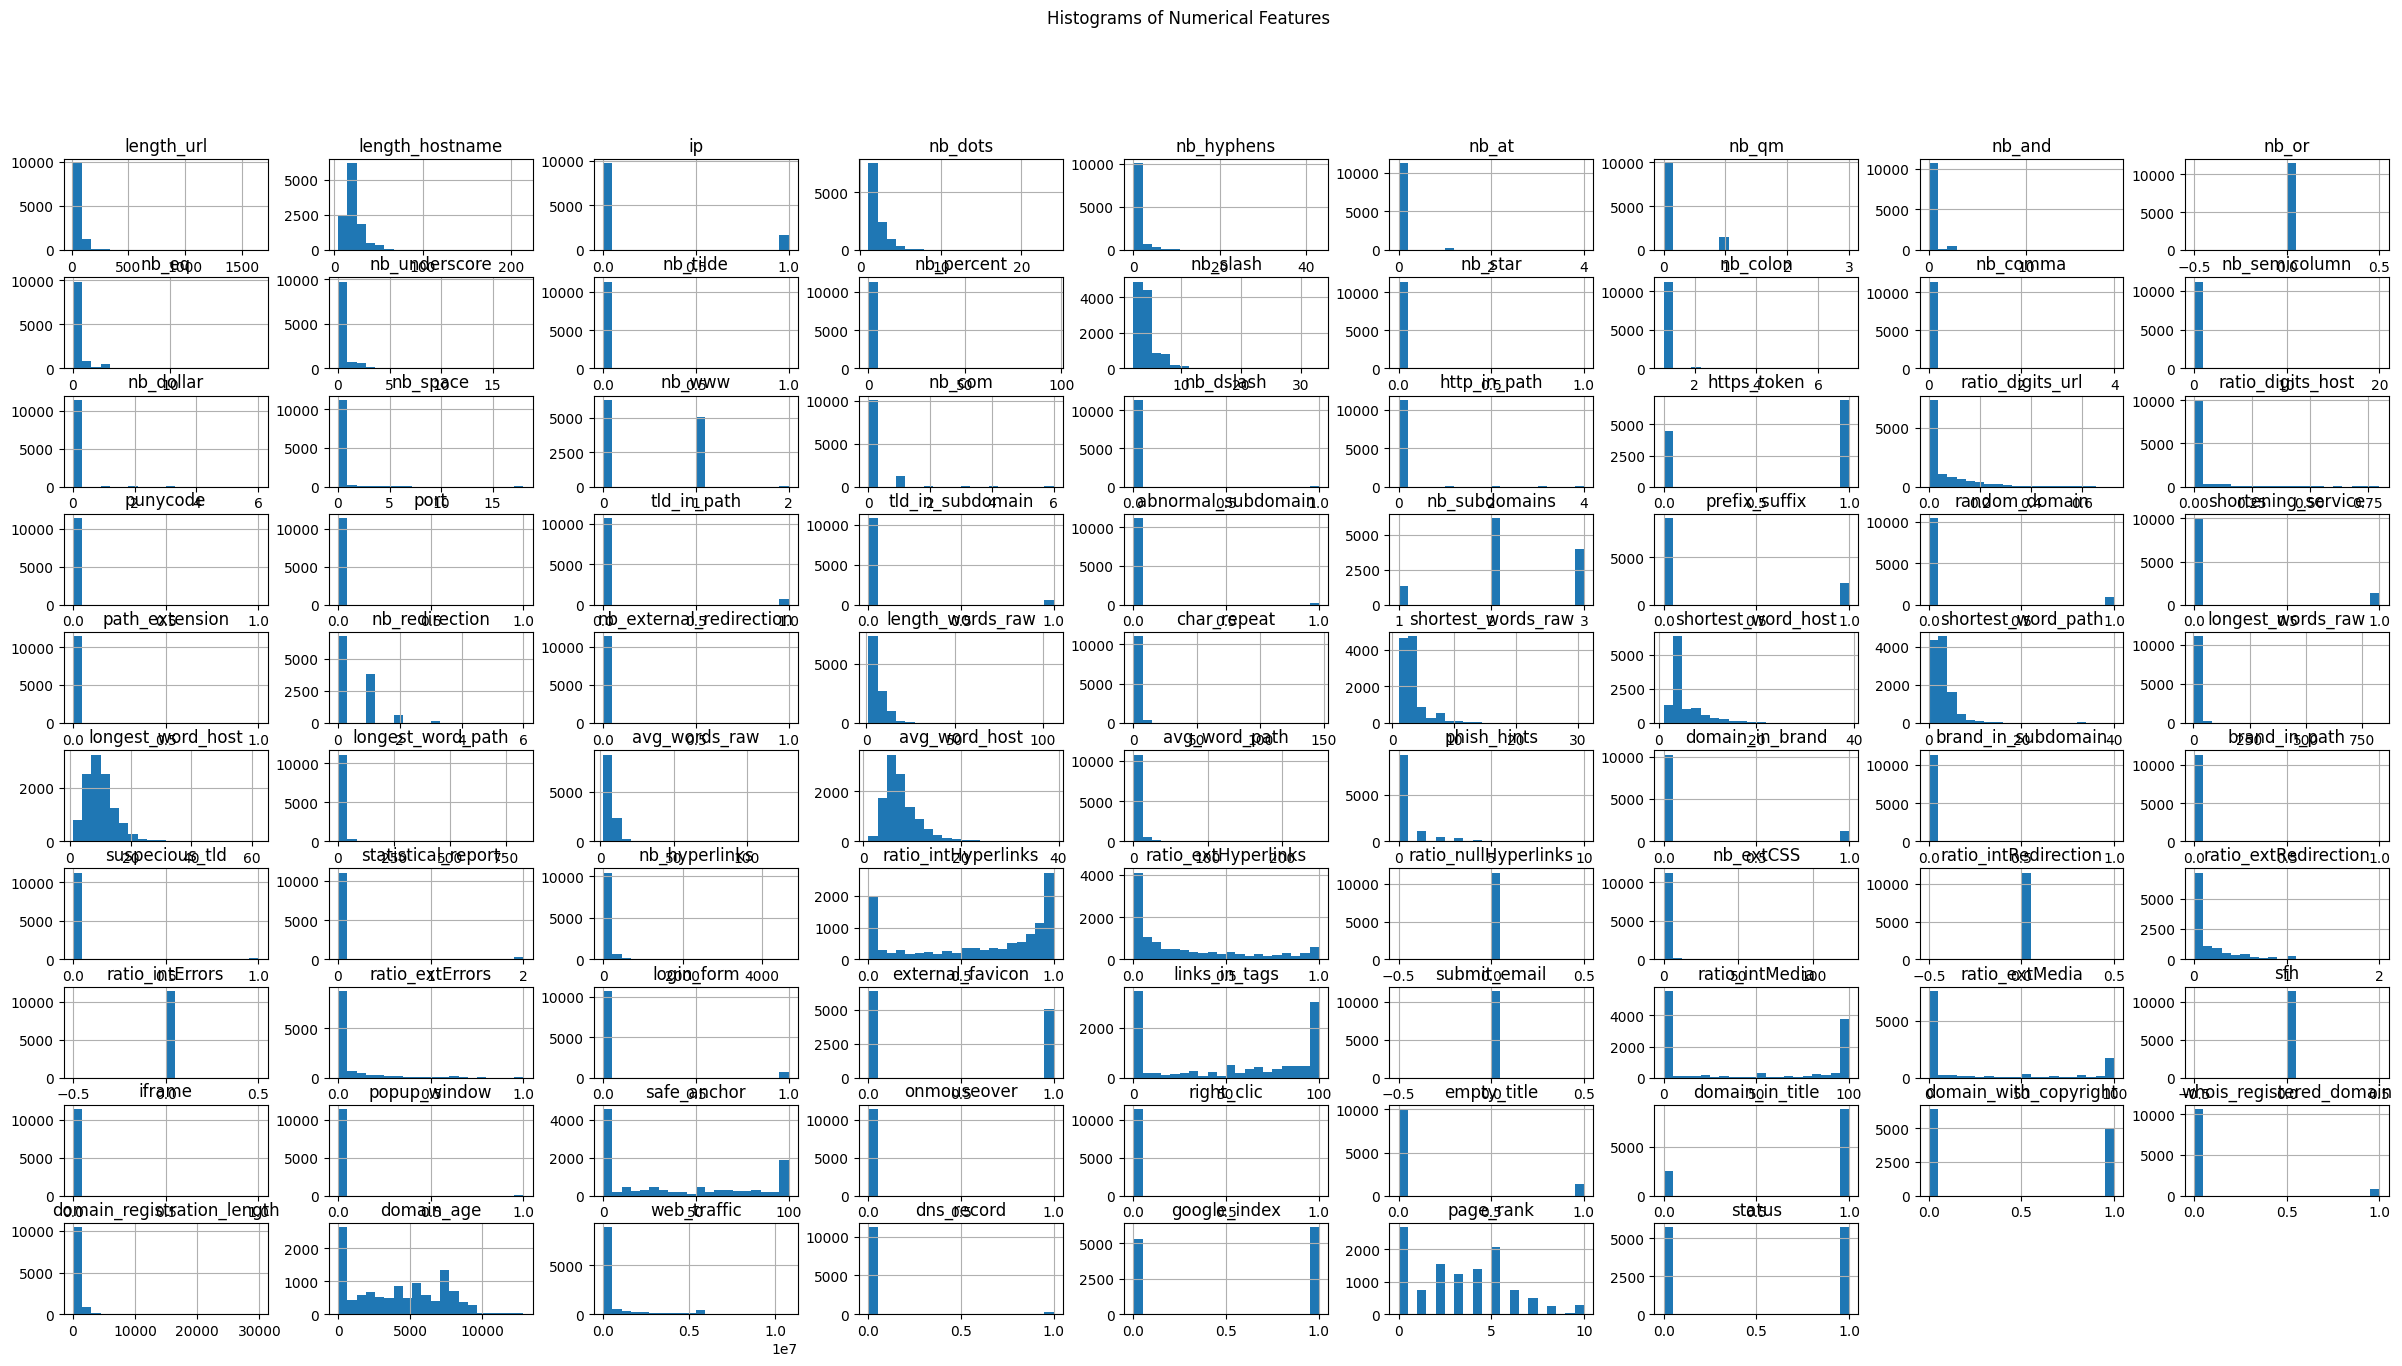

In [31]:
df.hist(bins=20, figsize=(30, 15))
plt.suptitle('Histograms of Numerical Features')
plt.show()


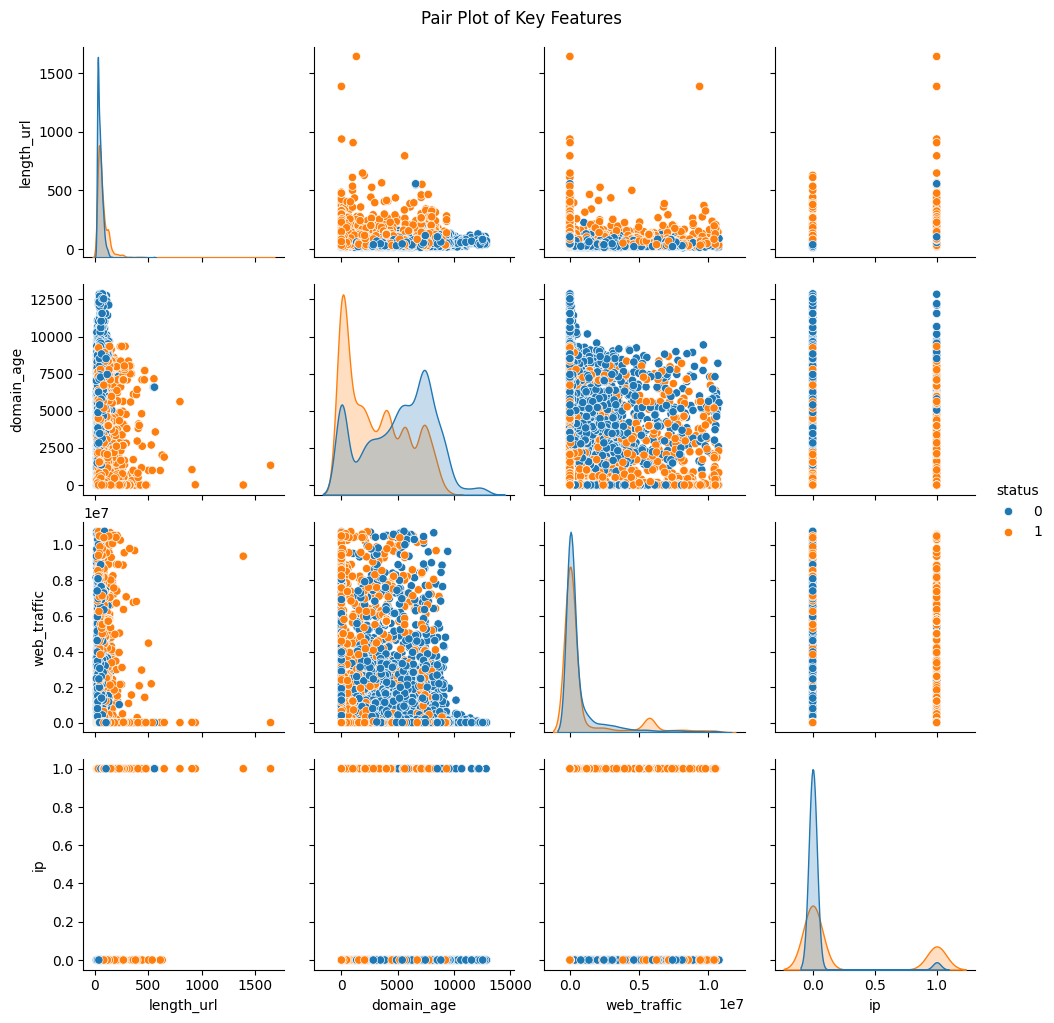

In [30]:
sample_cols = ['length_url', 'domain_age', 'web_traffic', 'ip', 'status']
sns.pairplot(df[sample_cols], hue='status')
plt.suptitle("Pair Plot of Key Features", y=1.02)
plt.show()


In [ ]:
outlier = {}

for column in numeric_df.columns:
    Q1 = numeric_df[column].quantile(0.25)
    Q3 = numeric_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = numeric_df[(numeric_df[column] < lower_bound) | (numeric_df[column] > upper_bound)]
    outliercount = outliers.shape[0]
    
    if outliercount > 0:
        outlier[column] = outliercount

# Display features with outliers
print("Features with outliers:")
for feature, count in outlier.items():
    print(f"{feature}:   {count} outliers")


Features with outliers:
length_url:   620 outliers
length_hostname:   775 outliers
ip:   1721 outliers
nb_dots:   567 outliers
nb_hyphens:   1371 outliers
nb_at:   245 outliers
nb_qm:   1555 outliers
nb_and:   761 outliers
nb_eq:   1564 outliers
nb_underscore:   1695 outliers
nb_tilde:   76 outliers
nb_percent:   355 outliers
nb_slash:   401 outliers
nb_star:   8 outliers
nb_colon:   197 outliers
nb_comma:   24 outliers
nb_semicolumn:   248 outliers
nb_dollar:   11 outliers
nb_space:   210 outliers
nb_com:   1327 outliers
nb_dslash:   75 outliers
http_in_path:   150 outliers
ratio_digits_url:   933 outliers
ratio_digits_host:   1503 outliers
punycode:   4 outliers
port:   27 outliers
tld_in_path:   750 outliers
tld_in_subdomain:   573 outliers
abnormal_subdomain:   247 outliers
prefix_suffix:   2314 outliers
random_domain:   952 outliers
shortening_service:   1411 outliers
path_extension:   2 outliers
nb_redirection:   166 outliers
nb_external_redirection:   36 outliers
length_words_ra